# London Crime Rate (2020-2022)

## Import Necessary Libraries 

In [63]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


## Load data

In [2]:
crime = pd.read_csv('Crime.csv', header=0)
crime = crime.reset_index(drop=True)
crime.head(5)

,MajorText,MinorText,LookUp_BoroughName,202003,202004,202005,202006,202007,202008,202009,...,202105,202106,202107,202108,202109,202110,202111,202112,202201,202202
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,2,2,4,4,6,2,...,6,5,4,12,6,7,6,1,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,107,80,86,120,123,114,116,...,128,142,130,144,111,126,109,116,126,110
2,Burglary,Burglary Business and Community,Barking and Dagenham,28,29,16,16,28,23,32,...,30,24,21,29,27,37,20,14,19,30
3,Burglary,Domestic Burglary,Barking and Dagenham,97,57,42,63,72,63,54,...,81,66,60,87,62,82,87,91,81,68
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,17,17,10,21,10,12,...,8,5,6,9,13,16,8,11,14,11


## Preview Table

In [4]:
crime2=crime.melt(id_vars=['MajorText', 'MinorText','LookUp_BoroughName'])   
month= crime2['variable'].str[-2:]
crime2['month']=month
year= crime2['variable'].str[:4]
crime2['year']=year
crime2

,MajorText,MinorText,LookUp_BoroughName,variable,value,month,year
0,Arson and Criminal Damage,Arson,Barking and Dagenham,202003,6,03,2020
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,202003,107,03,2020
2,Burglary,Burglary Business and Community,Barking and Dagenham,202003,28,03,2020
3,Burglary,Domestic Burglary,Barking and Dagenham,202003,97,03,2020
4,Drug Offences,Drug Trafficking,Barking and Dagenham,202003,6,03,2020
...,...,...,...,...,...,...,...
37123,Vehicle Offences,Theft from a Motor Vehicle,Westminster,202202,227,02,2022
37124,Vehicle Offences,Theft or Taking of a Motor Vehicle,Westminster,202202,46,02,2022
37125,Violence Against the Person,Homicide,Westminster,202202,0,02,2022
37126,Violence Against the Person,Violence with Injury,Westminster,202202,315,02,2022


## Pre-Analysis: Information Gathered About The Columns In The Table 
#### There are 6 columns:
1. MajorText: What offenders are formally charged with
2. MinorText: The specified crime that falls under major_category
3. LookUp_BoroughName: The borough, within London, where the crimes occured.
4. variable: The number of total minor category crimes committed, per month and borough.
5. month: The number month when the crime occurred in each borough (1 = January and  12 = December)
6. year = The year the report was recorded.

## Total Number of Major Crimes

In [5]:
majorCrime=ps.sqldf("""SELECT MajorText AS Major_crime, SUM(value) AS number_of_cases
                  FROM crime2
                  GROUP BY MajorText
                  ORDER BY SUM(value) DESC
                 """)
majorCrime

,Major_crime,number_of_cases
0,Violence Against the Person,457406
1,Theft,351193
2,Vehicle Offences,205500
3,Public Order Offences,115465
4,Burglary,110816
5,Arson and Criminal Damage,103514
6,Drug Offences,100970
7,Robbery,47878
8,Sexual Offences,43014
9,Miscellaneous Crimes Against Society,23342


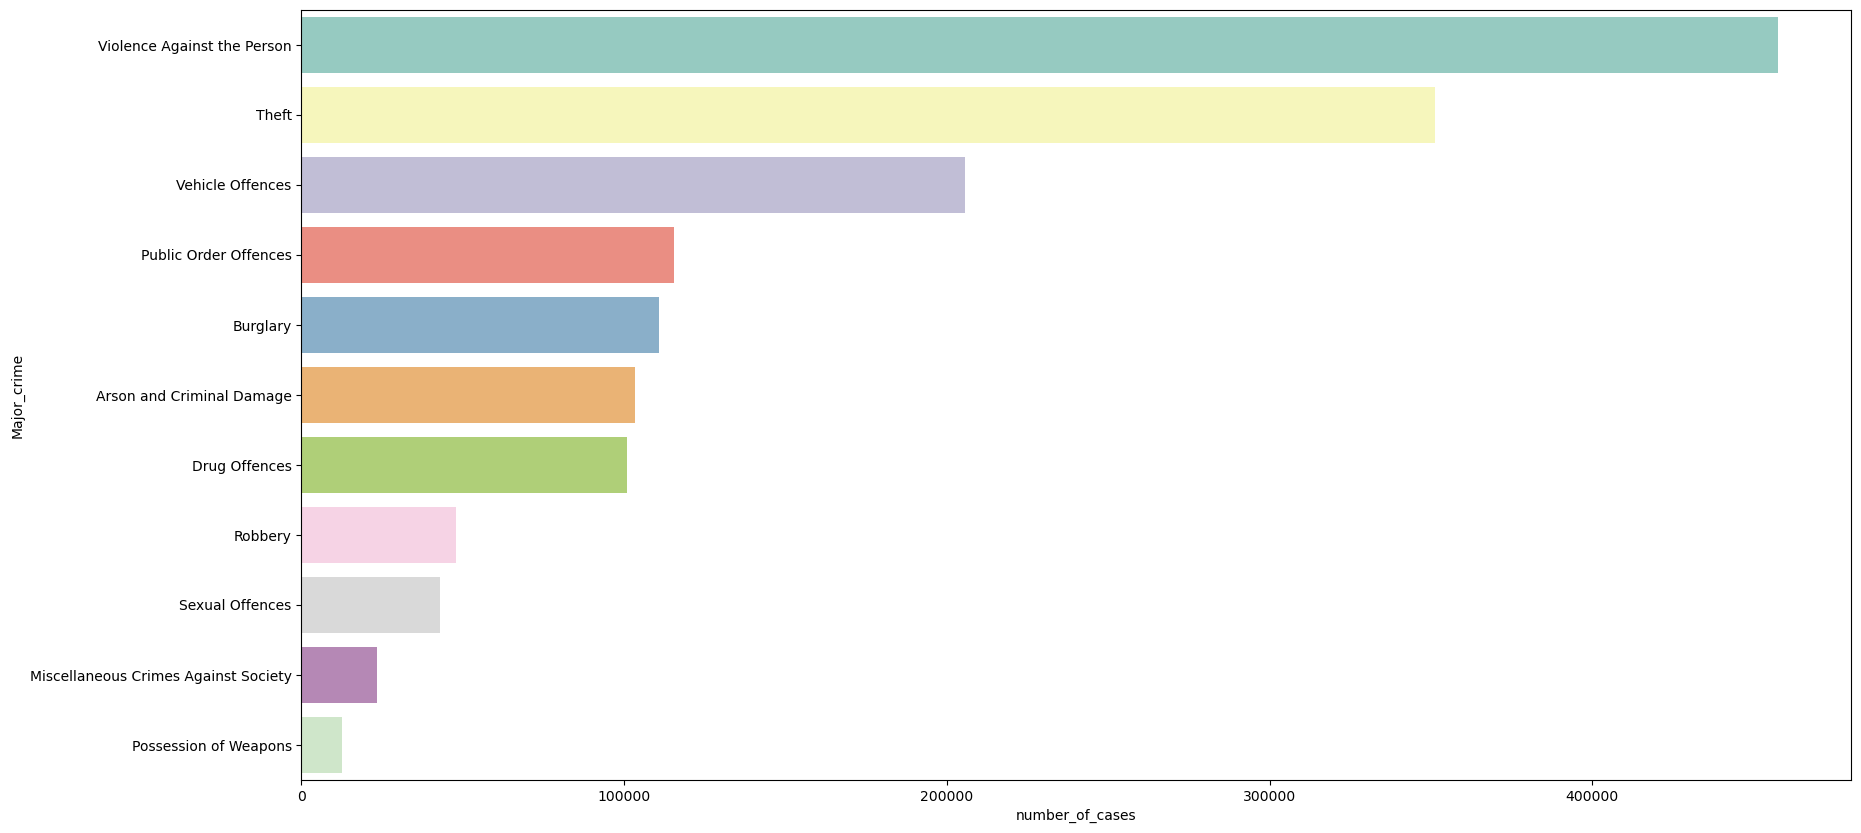

In [6]:
fig, (ax1) = plt.subplots(1, figsize=(20,10))
sns.barplot(data=majorCrime,x="number_of_cases", y="Major_crime",palette="Set3", ax=ax1)
plt.show()

## Total Number of Minor Crimes

In [7]:
minorCrime=ps.sqldf("""SELECT MinorText AS Minor_crime, SUM(value) AS number_of_cases
                  FROM crime2
                  WHERE year = 2021
                  GROUP BY MinorText
                  ORDER BY SUM(value) DESC
                
                 """)
minorCrime.head(5)

,Minor_crime,number_of_cases
0,Violence without Injury,162092
1,Other Theft,90227
2,Violence with Injury,71888
3,Theft from a Motor Vehicle,61448
4,Criminal Damage,51033


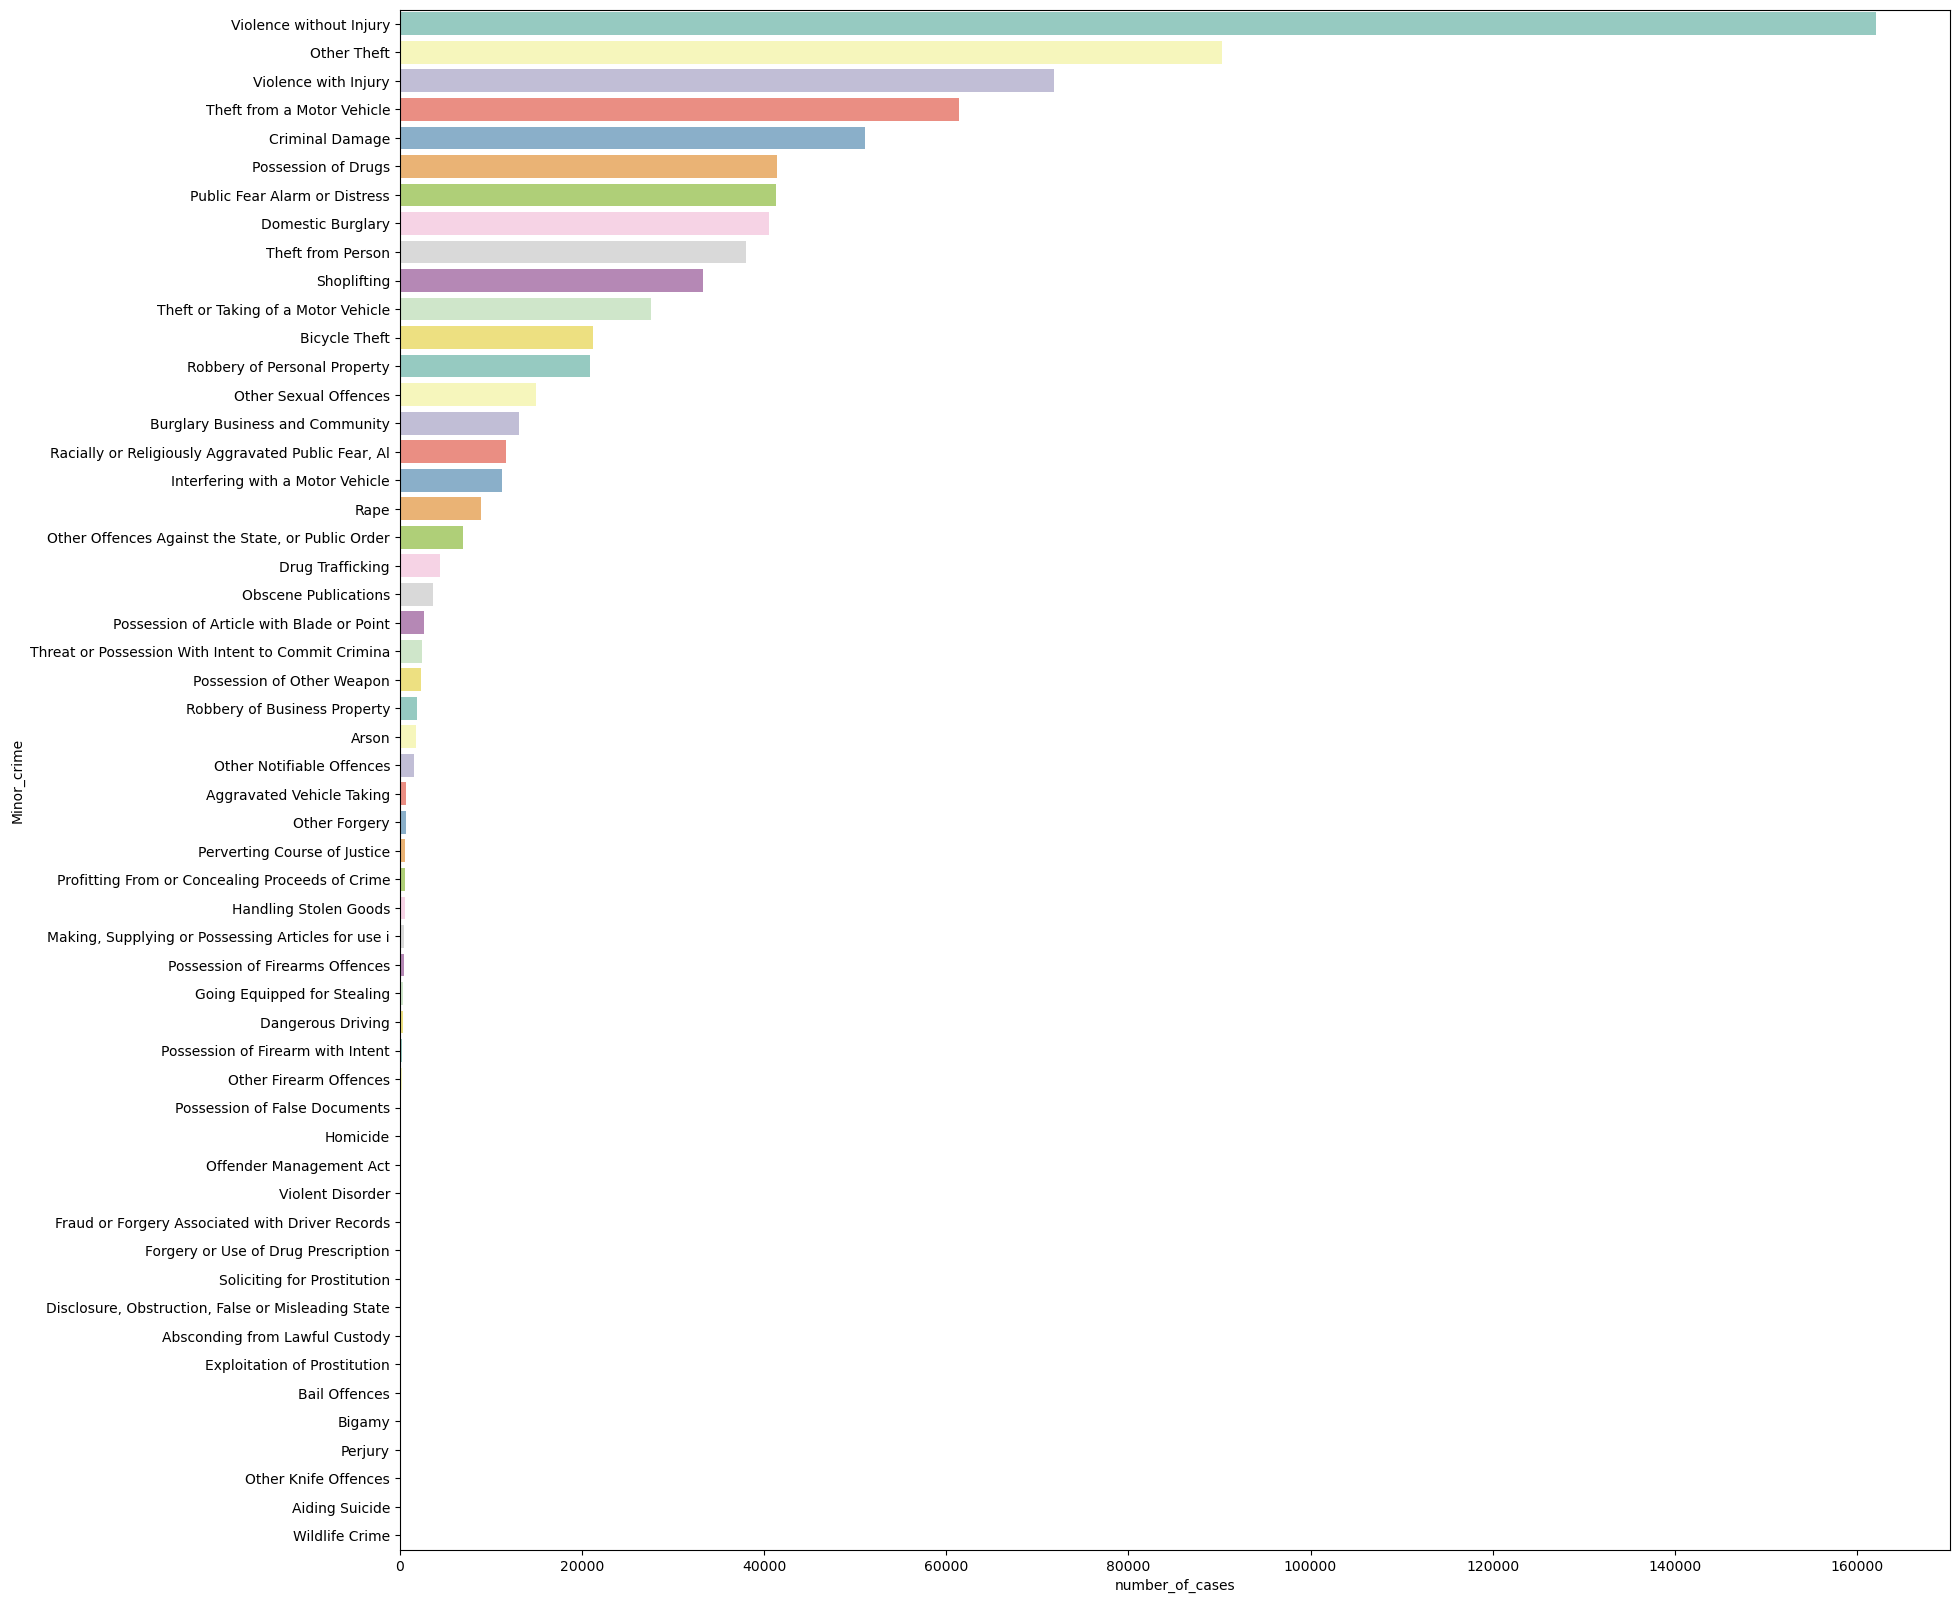

In [8]:
fig, (ax1) = plt.subplots(1, figsize=(20,20))
sns.barplot(data=minorCrime,x="number_of_cases", y="Minor_crime", palette="Set3",ax=ax1)
plt.show()

## Total Number of Crimes per year

In [9]:
yearCrime = ps.sqldf("""
    SELECT year,  SUM(value) AS num_crimes
    FROM crime2
    GROUP BY year
""")

yearCrime

,year,num_crimes
0,2020,643297
1,2021,794048
2,2022,134187


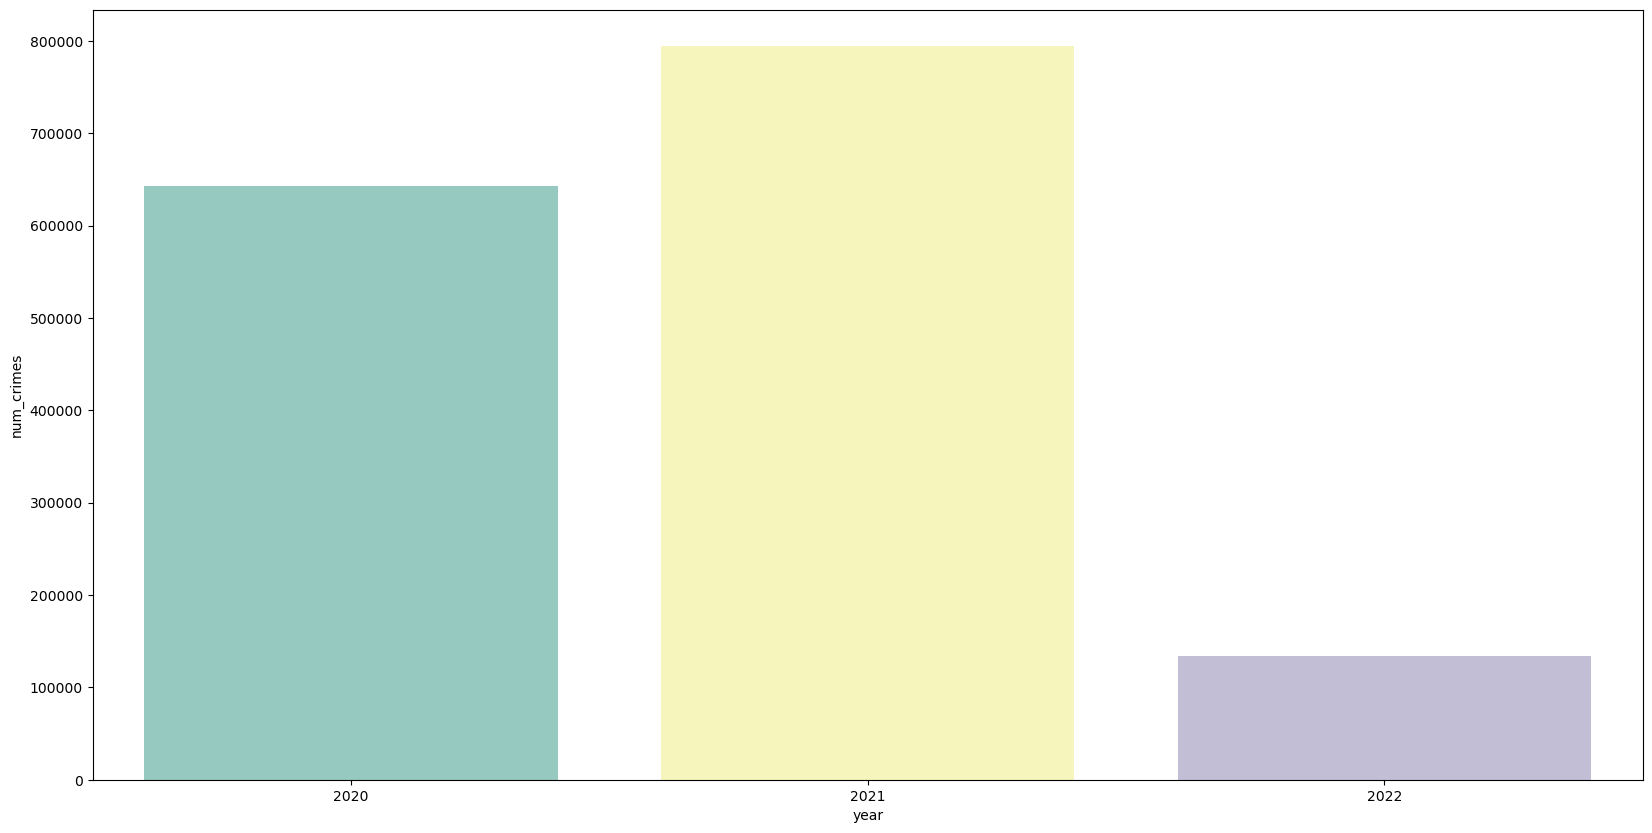

In [10]:
fig, (ax1) = plt.subplots(1, figsize=(20,10))
sns.barplot(data=yearCrime,x="year", y="num_crimes",palette="Set3", ax=ax1)
plt.show()

## Top 5 Major and Minor crimes in 2021

In [11]:
crime_stats_2021 = ps.sqldf("""
    WITH march2012Crime AS
    ( 
        SELECT *
        FROM crime2
        WHERE year = 2021 
    )
    SELECT majorText, minorText, SUM(value) AS total_crime_records
    FROM march2012Crime 
    
    GROUP BY majorText, minorText
    ORDER BY total_crime_records DESC
""")

crime_stats_2021[:5]


,MajorText,MinorText,total_crime_records
0,Violence Against the Person,Violence without Injury,162092
1,Theft,Other Theft,90227
2,Violence Against the Person,Violence with Injury,71888
3,Vehicle Offences,Theft from a Motor Vehicle,61448
4,Arson and Criminal Damage,Criminal Damage,51033


## Total Number of Crimes by months

In [12]:
crime_per_month=ps.sqldf("""SELECT month, sum(value) AS major_crime
                  FROM crime2
                  WHERE year = 2021
                  GROUP BY month
                  ORDER BY major_crime DESC
               """)
crime_per_month

,month,major_crime
0,10,76033
1,11,74268
2,07,71054
3,09,70318
4,06,69949
5,05,67731
6,12,67365
7,08,67349
8,03,62823
9,04,61981


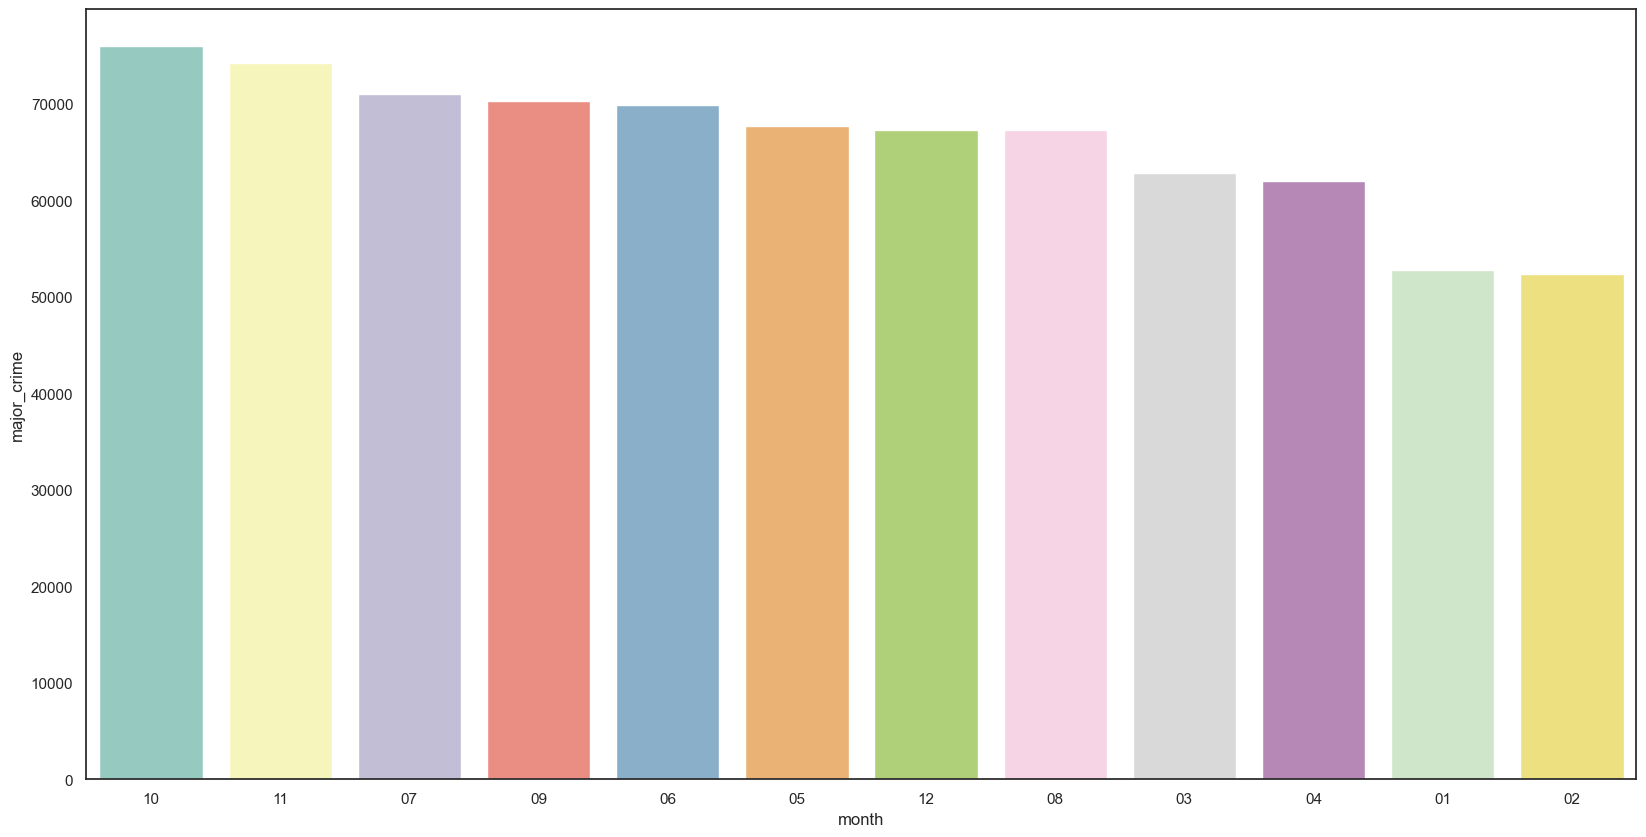

In [13]:
sns.set_theme(style="white")
fig, (ax1) = plt.subplots(1, figsize=(20,10))
sns.barplot(data=crime_per_month,x="month", y="major_crime",palette="Set3",ax=ax1)
plt.show()

## Top 5 Major and Minor Crimes in October

In [15]:
crime_stats_oct = ps.sqldf("""
    WITH octCrime AS
    ( 
        SELECT *
        FROM crime2
        WHERE month = 10
    )
    SELECT majorText, minorText, SUM(value) AS total_crime_records
    FROM octCrime 
    
    GROUP BY majorText, minorText
    ORDER BY total_crime_records DESC
""")

crime_stats_oct[:5]

,MajorText,MinorText,total_crime_records
0,Violence Against the Person,Violence without Injury,27713
1,Theft,Other Theft,17357
2,Vehicle Offences,Theft from a Motor Vehicle,12617
3,Violence Against the Person,Violence with Injury,12213
4,Arson and Criminal Damage,Criminal Damage,8857


## Total Number of Major Crimes by months

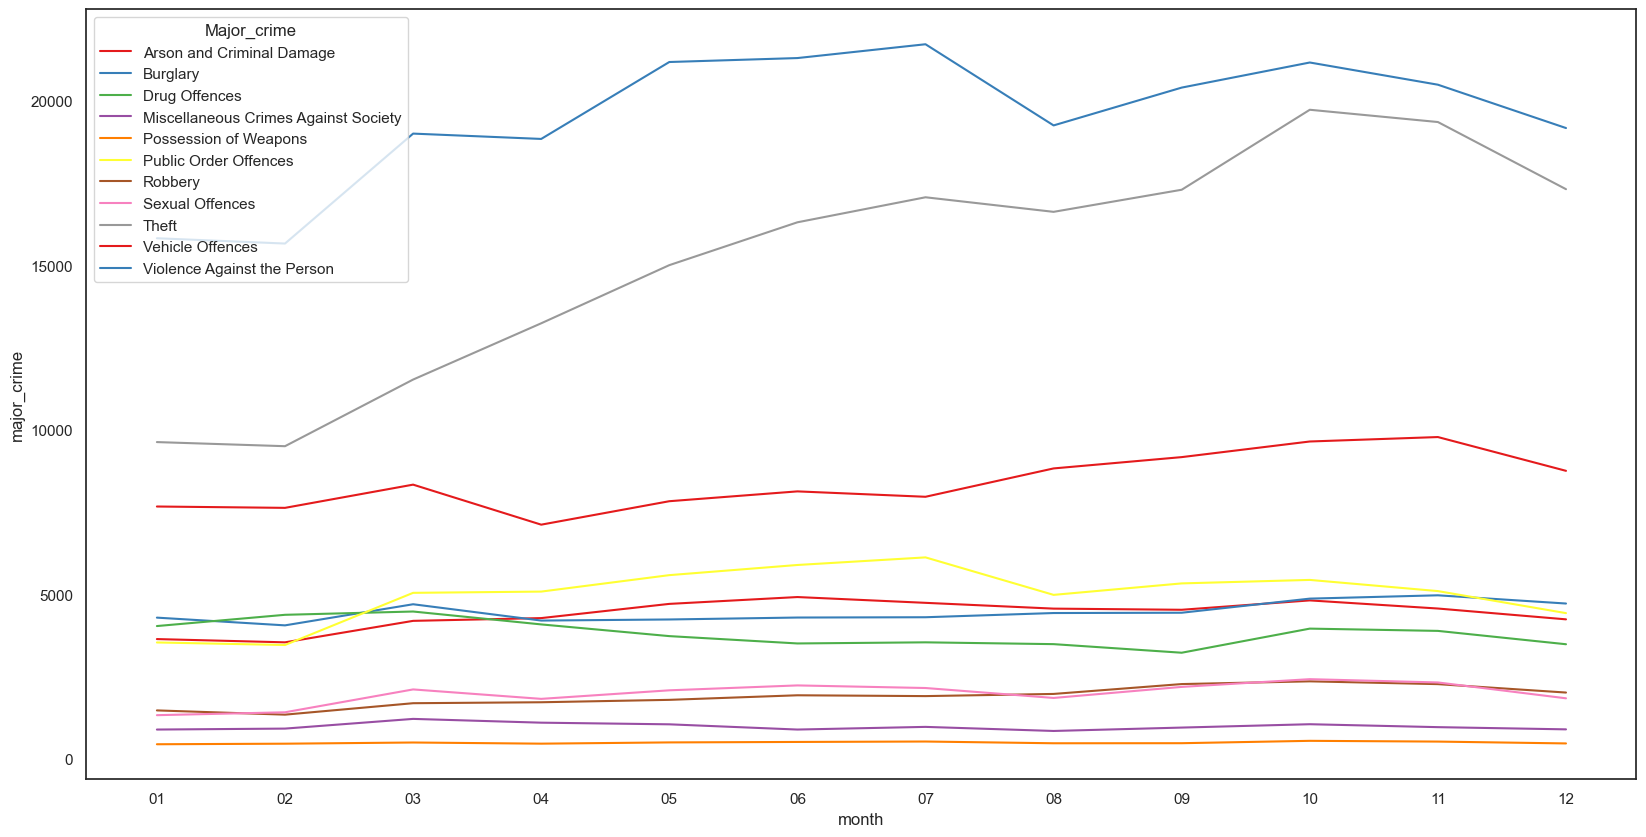

In [45]:
majorCrime_by_months=ps.sqldf("""SELECT month, sum(value) AS major_crime, MajorText AS Major_crime
                  FROM crime2
                  WHERE year = 2021
                  GROUP BY month,MajorText
                """)

sns.set_theme(style="white")
fig, (ax1) = plt.subplots(1, figsize=(20,10))
sns.lineplot(data=majorCrime_by_months,x="month", y="major_crime",hue="Major_crime",palette="Set1",ax=ax1)
plt.show()

## Which period contained the most recorded crime?

In [46]:
most_crime_period = ps.sqldf("""
    SELECT month, year, SUM(value) AS consec_value
    FROM crime2
    WHERE value > 0
    GROUP BY month, year
    ORDER BY consec_value DESC
    LIMIT 1
    """)

most_crime_period

,month,year,consec_value
0,10,2021,76033


## Top 5 Major and Minor Crimes for October 2021

In [48]:
crime_stats_Oct_2021 = ps.sqldf("""
    WITH octCrime2021 AS
    ( 
        SELECT *
        FROM crime2
        WHERE month = 10 and year = 2021
    )
    SELECT majorText, minorText, SUM(value) AS total_crime_records
    FROM octCrime2021
    
    GROUP BY majorText, minorText
    ORDER BY total_crime_records DESC
""")

crime_stats_Oct_2021[:5]

,MajorText,MinorText,total_crime_records
0,Violence Against the Person,Violence without Injury,14527
1,Theft,Other Theft,9769
2,Violence Against the Person,Violence with Injury,6633
3,Vehicle Offences,Theft from a Motor Vehicle,5866
4,Theft,Theft from Person,4768


## Total Number of Crimes by Borough

In [49]:
crimes_per_borough = ps.sqldf("""
    SELECT  LookUp_BoroughName AS area,  SUM(value) AS num_crimes
    FROM crime2
    GROUP BY  LookUp_BoroughName
    ORDER BY num_crimes DESC
""")
crimes_per_borough

,area,num_crimes
0,Westminster,97308
1,Newham,67611
2,Croydon,66007
3,Tower Hamlets,64911
4,Southwark,63175
5,Lambeth,62771
6,Hackney,61294
7,Ealing,58328
8,Enfield,57802
9,Haringey,57731


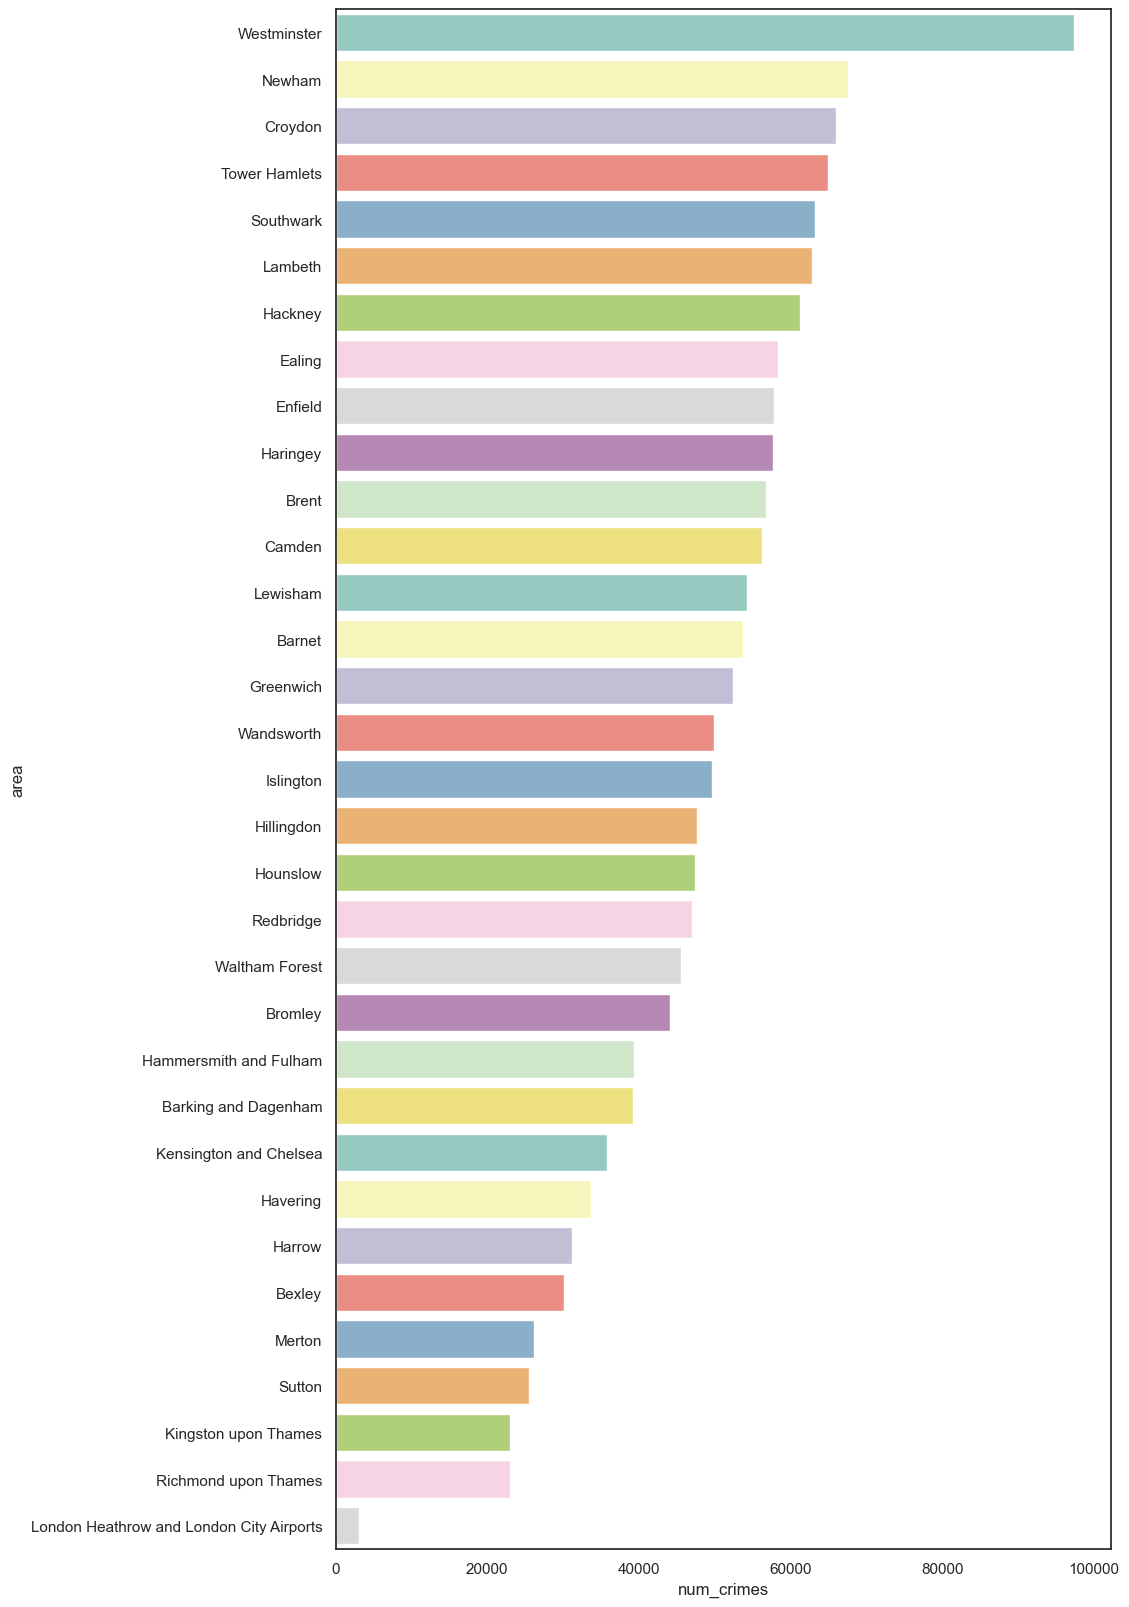

In [50]:
fig, (ax1) = plt.subplots(1, figsize=(10,20))
sns.barplot(data=crimes_per_borough,x="num_crimes", y="area", palette="Set3",ax=ax1)
plt.show()

## Total Number of Major Crimes by Borough 

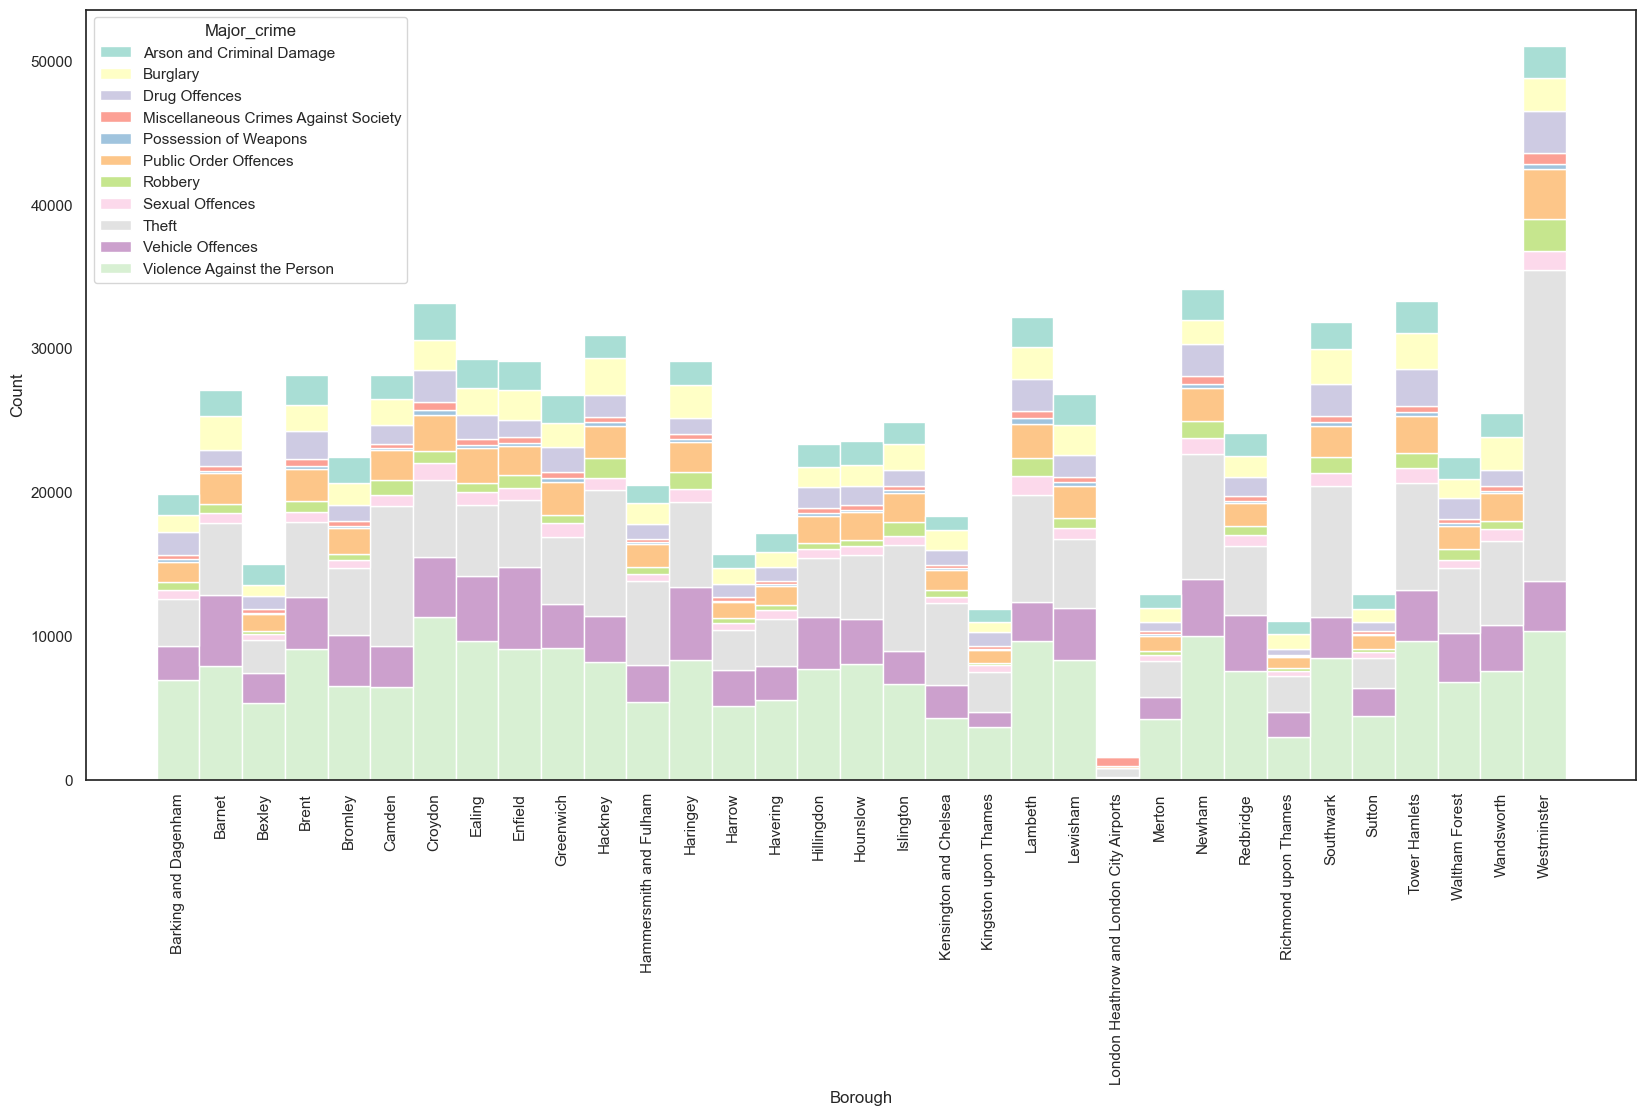

In [51]:
majorCrime_by_bor=ps.sqldf("""SELECT  LookUp_BoroughName AS Borough, MajorText AS Major_crime, SUM(value) AS num_cases
                 FROM crime2
                 WHERE year = 2021 
                 GROUP BY  LookUp_BoroughName, MajorText
                 """)

sns.set_theme(style="white")
fig, (ax1) = plt.subplots(1, figsize=(20,10))
sns.histplot(majorCrime_by_bor,x='Borough', weights='num_cases', hue='Major_crime',multiple='stack',palette="Set3",ax=ax1)
ax1.tick_params(axis='x', rotation=90)

## Total Number of Minor Crimes by Borough

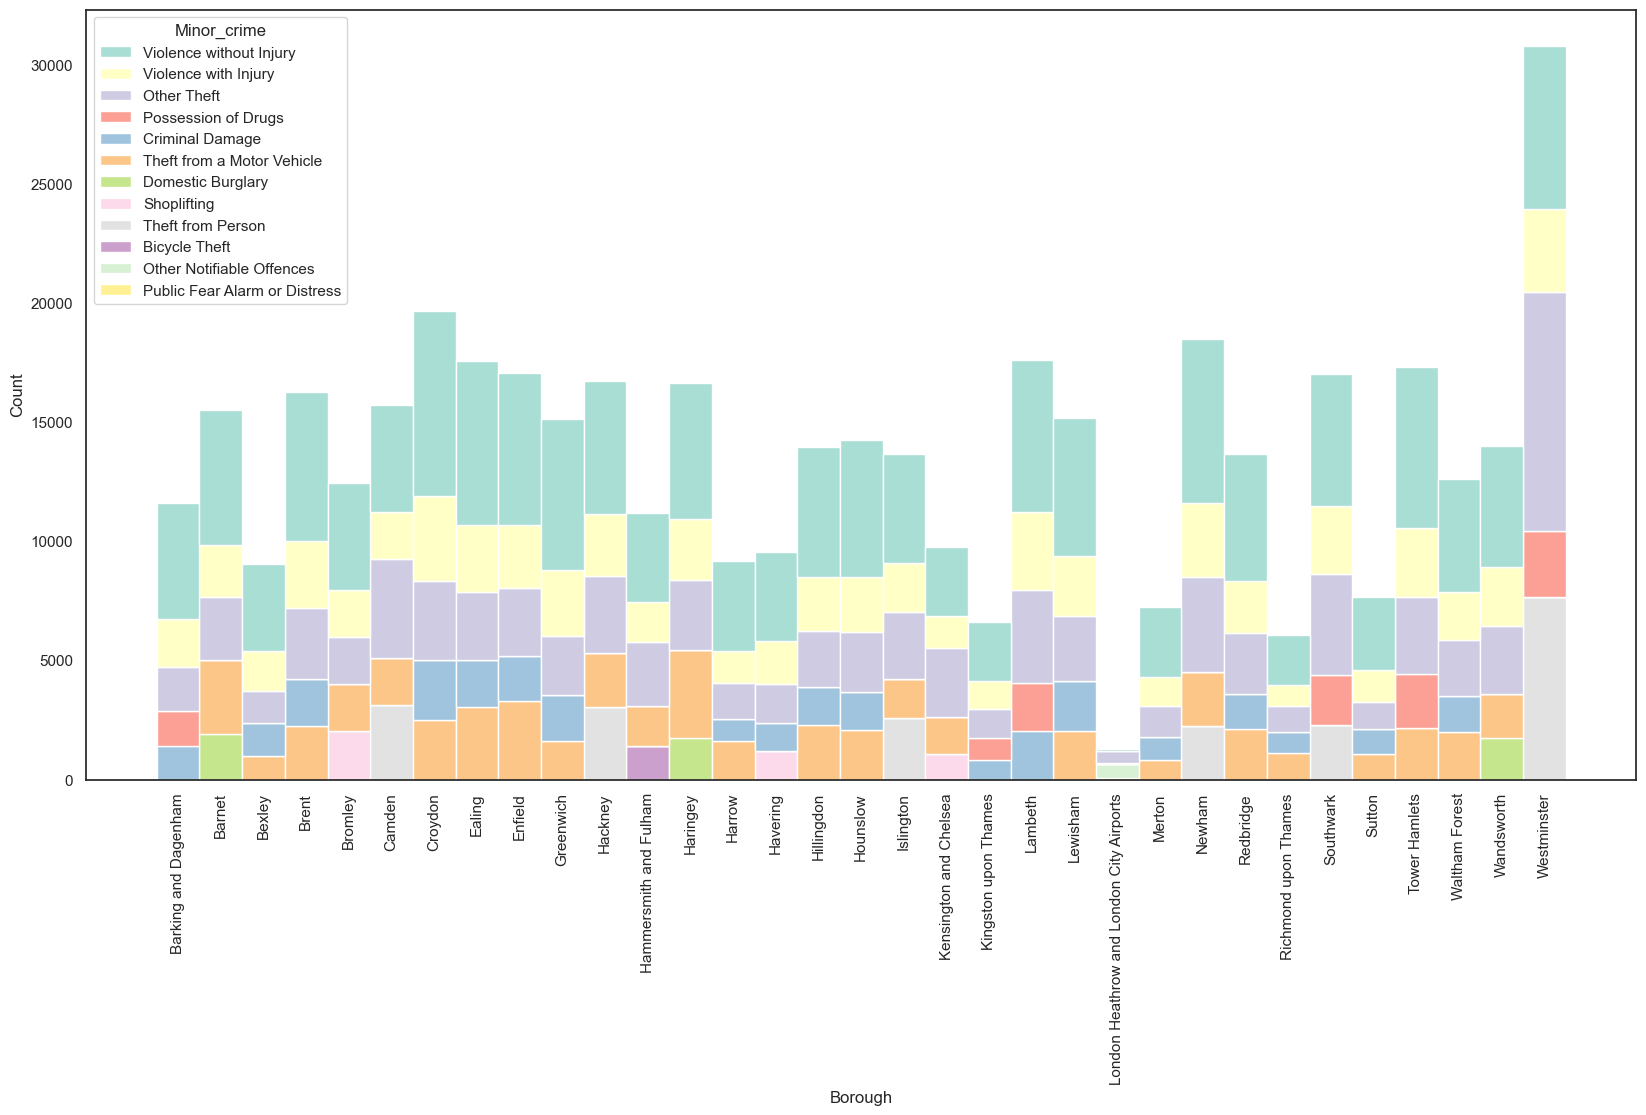

In [52]:
minorCrimes_by_bor=ps.sqldf("""SELECT * FROM(
                 SELECT  LookUp_BoroughName AS Borough, MinorText AS Minor_crime, SUM(value) AS num_cases,
                 ROW_NUMBER() OVER (PARTITION BY LookUp_BoroughName ORDER BY SUM(value) DESC) as Top 
                 FROM crime2
                 WHERE year = 2021 
                 GROUP BY  LookUp_BoroughName, MinorText) rank
                 WHERE top <= 5
               """)

fig, (ax1) = plt.subplots(1, figsize=(20,10))
sns.histplot(minorCrimes_by_bor,x='Borough', weights='num_cases', hue='Minor_crime',multiple='stack',palette="Set3",ax=ax1)
ax1.tick_params(axis='x', rotation=90)

## Major Crime Commonly Associated With Each London Borough Which Is Not Theft or Violence against the person

In [53]:
crimes_per_boro = ps.sqldf("""
WITH crime_boro_list AS (
    SELECT LookUp_BoroughName, majorText, minorText, SUM(value) AS num_crime
    FROM crime2
    WHERE majorText != 'Theft' AND majorText != 'Violence Against the Person'
    GROUP BY LookUp_BoroughName, majorText, minorText
)
SELECT *
FROM crime_boro_list
WHERE num_crime = ( 
    SELECT MAX(num_crime) 
    FROM crime_boro_list AS C
    WHERE crime_boro_list.LookUp_BoroughName = c.LookUp_BoroughName)
""")

crimes_per_boro

,LookUp_BoroughName,majorText,minorText,num_crime
0,Barking and Dagenham,Drug Offences,Possession of Drugs,3043
1,Barnet,Vehicle Offences,Theft from a Motor Vehicle,6131
2,Bexley,Arson and Criminal Damage,Criminal Damage,2725
3,Brent,Vehicle Offences,Theft from a Motor Vehicle,4596
4,Bromley,Vehicle Offences,Theft from a Motor Vehicle,3900
5,Camden,Vehicle Offences,Theft from a Motor Vehicle,4052
6,Croydon,Vehicle Offences,Theft from a Motor Vehicle,5467
7,Ealing,Vehicle Offences,Theft from a Motor Vehicle,5969
8,Enfield,Vehicle Offences,Theft from a Motor Vehicle,6668
9,Greenwich,Arson and Criminal Damage,Criminal Damage,3763


## What Period In Time Were The Most Crime Recorded per borough?

In [54]:
max_crime_period_query = ps.sqldf( """
    WITH period_most_crime AS (
        SELECT LookUp_BoroughName, majorText, month, year , SUM(value) AS num_crime
        FROM crime2
        GROUP BY LookUp_BoroughName, majorText, month, year
)
SELECT LookUp_BoroughName, majorText, month, year, num_crime
FROM period_most_crime
WHERE num_crime = ( 
    SELECT MAX(num_crime) 
    FROM period_most_crime AS p
    WHERE period_most_crime.LookUp_BoroughName = p.LookUp_BoroughName)
    ORDER BY num_crime DESC
""")

max_crime_period_query

,LookUp_BoroughName,majorText,month,year,num_crime
0,Westminster,Theft,12,2021,3172
1,Camden,Theft,10,2021,1169
2,Croydon,Violence Against the Person,10,2021,1089
3,Hackney,Theft,10,2021,1079
4,Newham,Theft,10,2021,997
5,Lambeth,Violence Against the Person,06,2021,960
6,Southwark,Theft,10,2021,959
7,Tower Hamlets,Violence Against the Person,07,2021,919
8,Ealing,Violence Against the Person,07,2021,906
9,Greenwich,Violence Against the Person,05,2021,854


## Total Number of Crimes For Each London Borough by year


In [59]:
crime_per_year = ps.sqldf("""
SELECT *
FROM (
    SELECT LookUp_BoroughName, 
        SUM(iif(year = 2020, value, 0)) num_2020,
        SUM(iif(year = 2021, value, 0)) num_2021,
        SUM(iif(year = 2022, value, 0)) num_2022
       
    FROM crime2
    WHERE value > 0  
    GROUP BY LookUp_BoroughName
)
""")

crime_per_year

,LookUp_BoroughName,num_2020,num_2021,num_2022
0,Barking and Dagenham,15991,19882,3319
1,Barnet,22175,27111,4442
2,Bexley,12522,14981,2589
3,Brent,23892,28135,4732
4,Bromley,17814,22454,3787
5,Camden,22960,28136,5108
6,Croydon,27391,33156,5460
7,Ealing,24336,29240,4752
8,Enfield,23772,29084,4946
9,Greenwich,21123,26756,4477


## Westminster Crime Rates

Text(0.5, 1.0, 'Westminster Total Crimes')

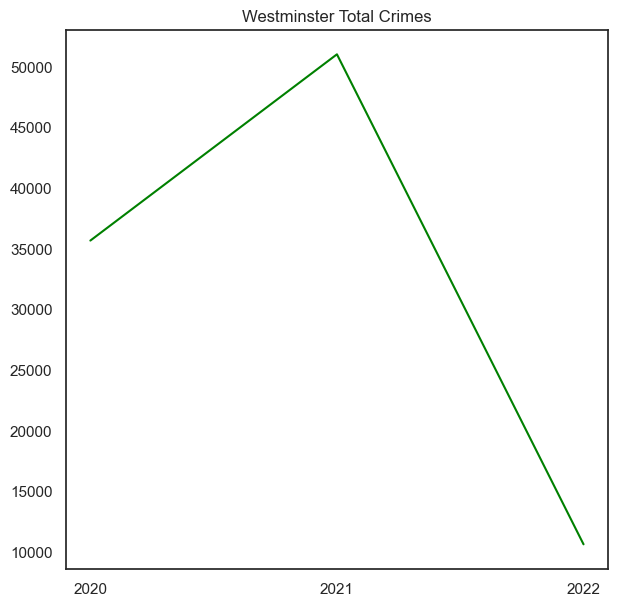

In [57]:
import matplotlib.pyplot as plt

westminster_crime = crime_per_year.iloc[32][1:]
plt.figure(figsize=(7,7))
plt.plot(yearCrime.year, westminster_crime, color="green")
plt.title("Westminster Total Crimes")


sns.set_theme(style="white")
fig, (ax1) = plt.subplots(1, figsize=(20,10))
sns.lineplot(data=majorCrime_by_months,x="yearCrime.year", y="major_crime",hue="Major_crime",palette="Set1",ax=ax1)
plt.show()

## London Heathrow and London City Airports Crime Rates

Text(0.5, 1.0, 'London Heathrow and London City Airports Total Crimes')

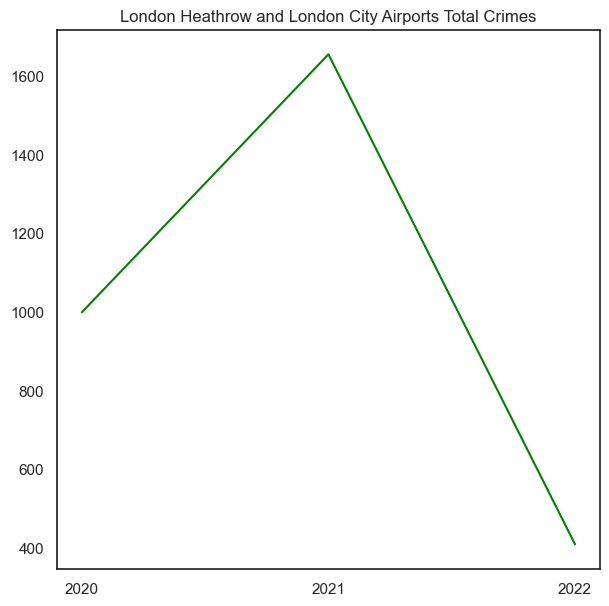

In [58]:
london_airport_crime = crime_per_year.iloc[22][1:]
plt.figure(figsize=(7,7))
plt.plot(yearCrime.year, london_airport_crime, color="green")
plt.title("London Heathrow and London City Airports Total Crimes")


## Rate of Change

In [64]:
rate_of_change = pd.DataFrame()

rate_of_change['LookUp_BoroughName'] = crime_per_year.LookUp_BoroughName
rate_of_change['change_crime_21'] = crime_per_year.num_2021.subtract(crime_per_year.num_2020)/crime_per_year.num_2021
rate_of_change['change_crime_22'] = crime_per_year.num_2022.subtract(crime_per_year.num_2021)/crime_per_year.num_2022

rate_of_change = rate_of_change.replace(np.nan, 0)
rate_of_change

,LookUp_BoroughName,change_crime_21,change_crime_22
0,Barking and Dagenham,0.195705,-4.990359
1,Barnet,0.182066,-5.103332
2,Bexley,0.164141,-4.786404
3,Brent,0.150809,-4.945689
4,Bromley,0.206645,-4.929232
5,Camden,0.183964,-4.508222
6,Croydon,0.173875,-5.072527
7,Ealing,0.167715,-5.153199
8,Enfield,0.182643,-4.880307
9,Greenwich,0.210532,-4.976323


array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

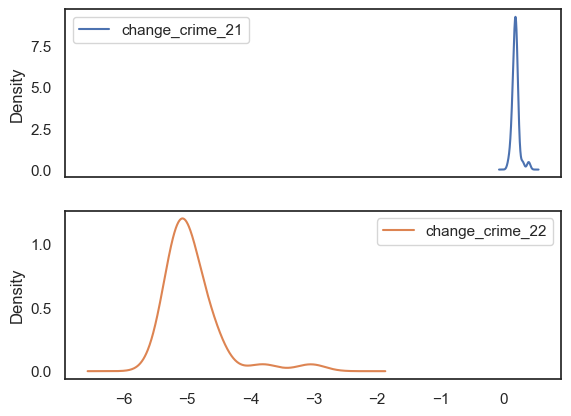

In [67]:
rate_of_change.plot(kind='kde', subplots=True)